In [1]:
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/hasmitha/SP24/Practicum/Assignment-3


In [4]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


## DATA PREPARATION

In [4]:
import pandas as pd

# Load dataset
df = pd.read_excel('/Users/hasmitha/SP24/Practicum/Assignment-3/OnlineRetail (1).xlsx')

# Preprocess data (e.g., removing missing values, filtering data)
df.dropna(subset=['CustomerID'], inplace=True)
df['CustomerID'] = df['CustomerID'].astype(int)
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## ASSOCIATION RULE LEARNING

###### CODE-1: PRINTING  ASSOCIATION RULES FROM THE FREQUENTLY PURHCASED ITEM SETS USING APRIORI

In [5]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Convert the dataset into a list of transactions
transactions = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
transactions = transactions.applymap(lambda x: 1 if x > 0 else 0)

# Find frequent itemsets
frequent_itemsets = apriori(transactions, min_support=0.02, use_colnames=True)

# Generate association rules
rules =   association_rules(frequent_itemsets, metric="lift", min_threshold=1)


/Users/hasmitha/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [6]:
import pandas as pd

# Format and print the rules in a nicer tabular format
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.width', 1000)  # Set the display width to prevent wrapping
pd.set_option('display.max_colwidth', None)  # Ensure full display of content in columns

# Selecting columns to display
columns_to_display = ['antecedents', 'consequents', 'support', 'confidence', 'lift']

# Convert frozensets to strings for nicer display
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Display the rules
print(rules[columns_to_display])


                           antecedents                         consequents   support  confidence       lift
0           ALARM CLOCK BAKELIKE GREEN           ALARM CLOCK BAKELIKE RED   0.023885    0.671736  16.996386
1            ALARM CLOCK BAKELIKE RED           ALARM CLOCK BAKELIKE GREEN  0.023885    0.604333  16.996386
2    GARDENERS KNEELING PAD KEEP CALM   GARDENERS KNEELING PAD CUP OF TEA   0.020865    0.612434  21.401429
3   GARDENERS KNEELING PAD CUP OF TEA    GARDENERS KNEELING PAD KEEP CALM   0.020865    0.729134  21.401429
4      GREEN REGENCY TEACUP AND SAUCER      PINK REGENCY TEACUP AND SAUCER  0.020730    0.665702  26.568210
5       PINK REGENCY TEACUP AND SAUCER     GREEN REGENCY TEACUP AND SAUCER  0.020730    0.827338  26.568210
6      GREEN REGENCY TEACUP AND SAUCER    ROSES REGENCY TEACUP AND SAUCER   0.024380    0.782923  22.187826
7     ROSES REGENCY TEACUP AND SAUCER      GREEN REGENCY TEACUP AND SAUCER  0.024380    0.690932  22.187826
8              JUMBO BAG PIN

###### CODE-2: PRINTING  ASSOCIATION RULES FROM THE FREQUENTLY PURHCASED ITEM SETS WITHOUT APRIORI

In [7]:
import pandas as pd
from itertools import combinations

# Convert 'Description' to string to avoid potential issues with other data types
df['Description'] = df['Description'].astype(str)

# Calculate the frequency of individual items
item_frequency = df['Description'].value_counts()

# Total number of transactions
total_transactions = df['InvoiceNo'].nunique()

# Create a mapping of InvoiceNo to list of Descriptions (items)
invoice_to_items = df.groupby('InvoiceNo')['Description'].apply(list)

# Calculate pair frequency and support
pair_support = {}
for items in invoice_to_items:
    for item_pair in combinations(set(items), 2):
        pair_support[item_pair] = pair_support.get(item_pair, 0) + 1

# Calculate support, confidence, and lift for each pair
rules = []
for (item1, item2), freq in pair_support.items():
    support = freq / total_transactions
    confidence1 = freq / item_frequency.get(item1, 0)
    lift1 = confidence1 / (item_frequency.get(item2, 0) / total_transactions)
    
    # Add rule if confidence and lift are greater than given thresholds
    if confidence1 > 0.5 and lift1 > 1:
        rules.append((item1, item2, support, confidence1, lift1))

# Convert rules to DataFrame
rules_df = pd.DataFrame(rules, columns=['antecedents', 'consequents', 'support', 'confidence', 'lift'])

# Sort the rules by confidence and lift, descending
sorted_rules = rules_df.sort_values(by=['confidence', 'lift'], ascending=[False, False])

# Reset index to match the desired output format
sorted_rules.reset_index(drop=True, inplace=True)

In [8]:
# Print the rules
print(sorted_rules.head())  # Show the first few rules


                           antecedents                        consequents   support  confidence     lift
0         CAKESTAND, 3 TIER, LOVEHEART               GLASS BELL JAR LARGE  0.000045         1.0  22190.0
1         CAKESTAND, 3 TIER, LOVEHEART               GLASS BELL JAR SMALL  0.000045         1.0  22190.0
2                 GLASS BELL JAR LARGE               GLASS BELL JAR SMALL  0.000045         1.0  22190.0
3             VINTAGE BLUE TINSEL REEL    JARDIN ETCHED GLASS BUTTER DISH  0.000045         1.0  22190.0
4  BLUE/GREEN SHELL NECKLACE W PENDANT  BLUE LEAVES AND BEADS PHONE CHARM  0.000045         1.0  22190.0


##### The first code (CODE-1) uses the mlxtend library to generate frequent itemsets and rules, which is an optimized and well-tested implementation for association rule mining. The second code (CODE-2) attempts to manually recreate this process, which can introduce discrepancies if not done with the same level of precision, especially with the handling of itemsets and calculations.

#####  To make CODE-2 work like CODE-1 and output rules , you need to ensure that the support, confidence, and lift calculations are done in the same manner and that the same thresholds are applied. Additionally, you need to account for the directionality of the rules, as mlxtend may treat item pairs (A, B) and (B, A) differently. Overall this calls for mlxtend.

## POPULAR ITEMS RECOMMENDATION

##### THIS FUNCTION RECOMMENDS TOP 'N' PURCHASES 

In [9]:
# Calculate item popularity
item_popularity = df['Description'].value_counts().reset_index()
item_popularity.columns = ['Description', 'Popularity']

# Function to recommend popular items
def recommend_popular_items(n):
    return item_popularity.head(n)


In [10]:
# Display the top 5 popular items for recommendation
recommend_popular_items(5)

,Description,Popularity
0,WHITE HANGING HEART T-LIGHT HOLDER,2070
1,REGENCY CAKESTAND 3 TIER,1905
2,JUMBO BAG RED RETROSPOT,1662
3,ASSORTED COLOUR BIRD ORNAMENT,1418
4,PARTY BUNTING,1416


In [11]:
# Display the top 10 popular items for recommendation
recommend_popular_items(10)

,Description,Popularity
0,WHITE HANGING HEART T-LIGHT HOLDER,2070
1,REGENCY CAKESTAND 3 TIER,1905
2,JUMBO BAG RED RETROSPOT,1662
3,ASSORTED COLOUR BIRD ORNAMENT,1418
4,PARTY BUNTING,1416
5,LUNCH BAG RED RETROSPOT,1358
6,SET OF 3 CAKE TINS PANTRY DESIGN,1232
7,POSTAGE,1196
8,LUNCH BAG BLACK SKULL.,1126
9,PACK OF 72 RETROSPOT CAKE CASES,1080


## COLLABORATIVE FILTERING

###### THIS FUNCTION IS TO RECOMMEND ITEMS FOR A PARTICULAR CUSTOMER USING COLLABORATIVE FILTERING TECHNIQUE

In [5]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Create a user-item matrix
user_item_matrix = df.pivot_table(index='CustomerID', columns='Description', values='Quantity', aggfunc='sum').fillna(0)

# Compute user similarity
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

#function to recommend items based on collaborative filtering
def recommend_collaborative_filtering(user_id, n=5):
    if user_id not in user_similarity_df.index:
        raise ValueError(f"User ID {user_id} not found in the User-Item Matrix.")
    
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).index[1:]
    recommended_items = pd.Series()
    for similar_user in similar_users:
        similar_user_items = user_item_matrix.loc[similar_user]
        recommended_items = pd.concat([recommended_items, similar_user_items])
    
    # Drop any potential NaN values that might have been introduced during concatenation
    recommended_items = recommended_items.dropna()
    
    # Group by item and sum quantities, then sort by the summed quantity to find most popular
    recommended_items = recommended_items.groupby(recommended_items.index).sum().sort_values(ascending=False)
    
    # Return the top N recommended item names
    return recommended_items.head(n).index.tolist()


In [13]:
# Example usage
recommended_items = recommend_collaborative_filtering(user_id=15311, n=5)
print(recommended_items)

['WORLD WAR 2 GLIDERS ASSTD DESIGNS', 'JUMBO BAG RED RETROSPOT', 'ASSORTED COLOUR BIRD ORNAMENT', 'WHITE HANGING HEART T-LIGHT HOLDER', 'PACK OF 72 RETROSPOT CAKE CASES']


## MAIN INTERFACE FUNCTION

##### THIS FUNCTION IS TO SUGGEST WHICH ITEM SHOULD BE RECOMENDED TO A PARTICULAR CUSTOMER BASED ON HIS CURRENT PURCHASE

In [16]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from datetime import datetime



def RecommendItems(CurItemOfInterest, CustomerID, Country, Time, Date):
    # Convert date and time strings to datetime objects
    Date_Time = datetime.strptime(f'{Date} {Time}', '%Y-%m-%d %H:%M:%S')
    
    # Filter the dataset for the current user, country, and day
    user_data = df[(df['CustomerID'] == CustomerID) & 
                   (df['Country'] == Country) & 
                   (df['InvoiceDate'].dt.date == Date_Time.date())]
    
    # Further filter data by time (within an hour range for this example)
    user_data = user_data[(user_data['InvoiceDate'].dt.hour == Date_Time.hour)]
    
    # Check if the current item of interest is in the user's transactions
    # If so, look for association rules involving this item
    if CurItemOfInterest in user_data['Description'].unique():
        # Convert the user's transactions into a format suitable for the Apriori algorithm
        basket = (user_data.groupby(['InvoiceNo', 'Description'])['Quantity']
                  .sum().unstack().fillna(0))
        basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)
        
        # Generate frequent itemsets
        frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
        
        # Generate association rules
        rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
        rules = rules[rules['antecedents'].apply(lambda x: CurItemOfInterest in x)]
        
        # Sort rules by confidence and lift
        rules.sort_values(by=['confidence', 'lift'], ascending=False, inplace=True)
        
        # Return the consequents of the top rule as the recommendation
        if not rules.empty:
            recommendations = list(rules.iloc[0]['consequents'])
        else:
            recommendations = "No recommendations found based on the current item of interest."
    else:
        recommendations = "Current item of interest not found in recent transactions."
    
    return recommendations


In [17]:
# Example:
recommendations = RecommendItems('WHITE HANGING HEART T-LIGHT HOLDER', 17850, 'United Kingdom', '08:26:00', '2010-12-01')
print(recommendations)

['CREAM CUPID HEARTS COAT HANGER']


/Users/hasmitha/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


## DATA VISUALIZATION

### 1. Visualize the most frequently bought items

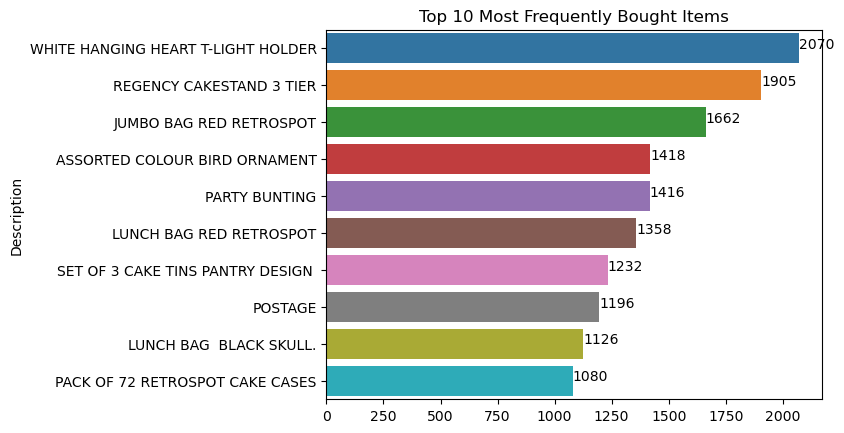

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the top 10 most frequently bought items
top_items = df['Description'].value_counts().head(10)

# Create a bar plot for the top items
sns.barplot(y=top_items.index, x=top_items.values, orient='h')
plt.title('Top 10 Most Frequently Bought Items')

# Add the numbers on top of the bars
for index, value in enumerate(top_items):
    plt.text(value, index, str(value))

plt.show()



##### MORE PROOF FOR OUR RECOMMENDED POPULAR ITEMS

In [19]:
# Display the top 10 popular items for recommendation
recommend_popular_items(10)

,Description,Popularity
0,WHITE HANGING HEART T-LIGHT HOLDER,2070
1,REGENCY CAKESTAND 3 TIER,1905
2,JUMBO BAG RED RETROSPOT,1662
3,ASSORTED COLOUR BIRD ORNAMENT,1418
4,PARTY BUNTING,1416
5,LUNCH BAG RED RETROSPOT,1358
6,SET OF 3 CAKE TINS PANTRY DESIGN,1232
7,POSTAGE,1196
8,LUNCH BAG BLACK SKULL.,1126
9,PACK OF 72 RETROSPOT CAKE CASES,1080


### 2. Visualize purchase time patterns

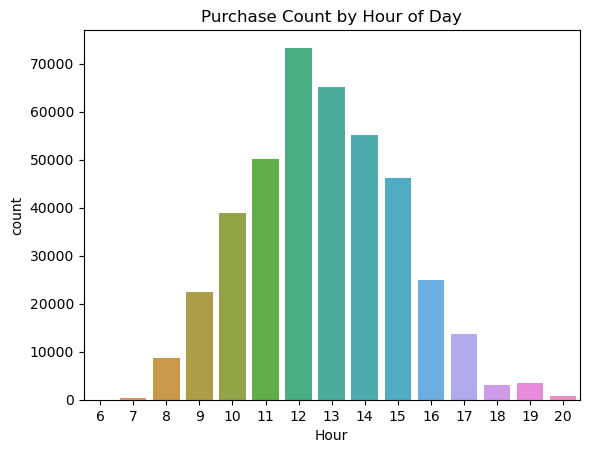

In [21]:
# Visualize purchase time patterns by hour
df['Hour'] = df['InvoiceDate'].dt.hour
sns.countplot(x='Hour', data=df)
plt.title('Purchase Count by Hour of Day')
plt.show()

### 3. Visualize monthly purchase patterns

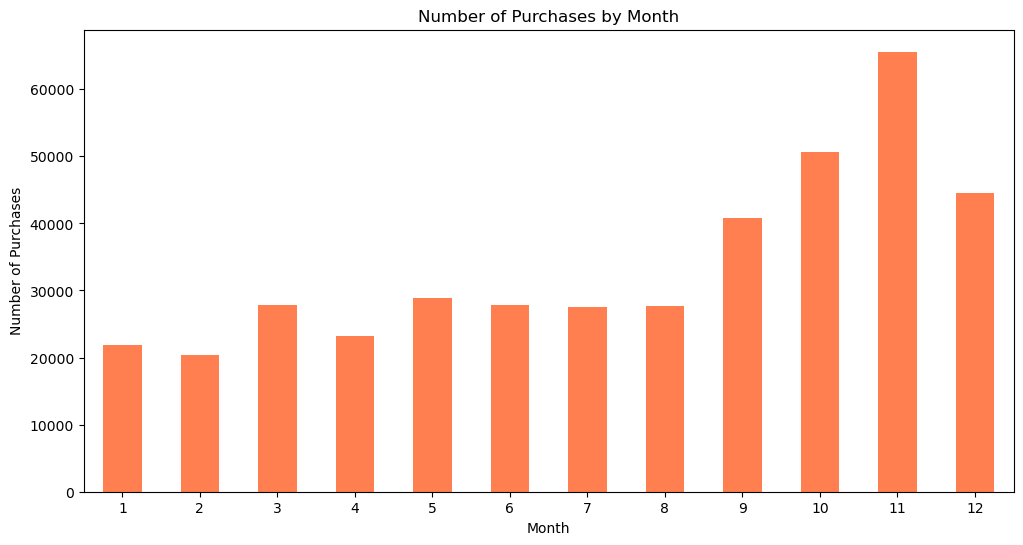

In [32]:

# Plotting the bar chart for the number of purchases by month
plt.figure(figsize=(12, 6))
sales_by_month.plot(kind='bar', color='coral')
plt.title('Number of Purchases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=0)
plt.show()



### 4.Calculate the average order value for November and January

Average order value in November: 366.9500129617628
Average order value in January: 384.3643851132686


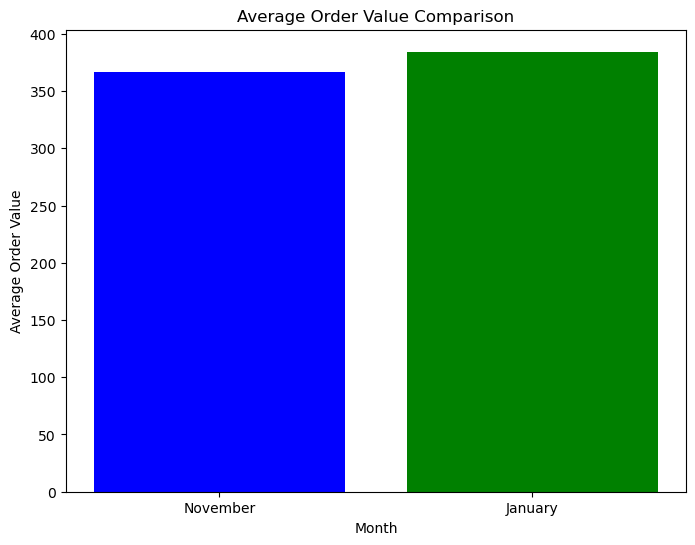

In [14]:
import matplotlib.pyplot as plt

# Data
months = ['November', 'January']
avg_values = [avg_nov_value, avg_jan_value]

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
november_data = df[df['InvoiceDate'].dt.month == 11]
january_data = df[df['InvoiceDate'].dt.month == 1]
avg_nov_value = november_data.groupby('InvoiceNo')['TotalPrice'].sum().mean()
avg_jan_value = january_data.groupby('InvoiceNo')['TotalPrice'].sum().mean()
print(f"Average order value in November: {avg_nov_value}")
print(f"Average order value in January: {avg_jan_value}")

# Plot
plt.figure(figsize=(8, 6))
plt.bar(months, avg_values, color=['blue', 'green'])
plt.title('Average Order Value Comparison')
plt.xlabel('Month')
plt.ylabel('Average Order Value')
plt.show()
